In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

plt.rcParams['font.family'] = 'SimSun'
daily_sales = pd.read_csv('data.csv',encoding='gbk')

# 将'航班日期'列转换为日期类型
daily_sales['航班日期'] = pd.to_datetime(daily_sales['航班日期'])

# 设置'航班日期'列为索引
daily_sales.set_index('航班日期', inplace=True)

# 进行差分
diff_sales_1 = daily_sales['航线金额'].diff()
diff_sales_2 = diff_sales_1.diff()
diff_sales_3 = diff_sales_2.diff()

D:\anaconda\envs\datawym\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


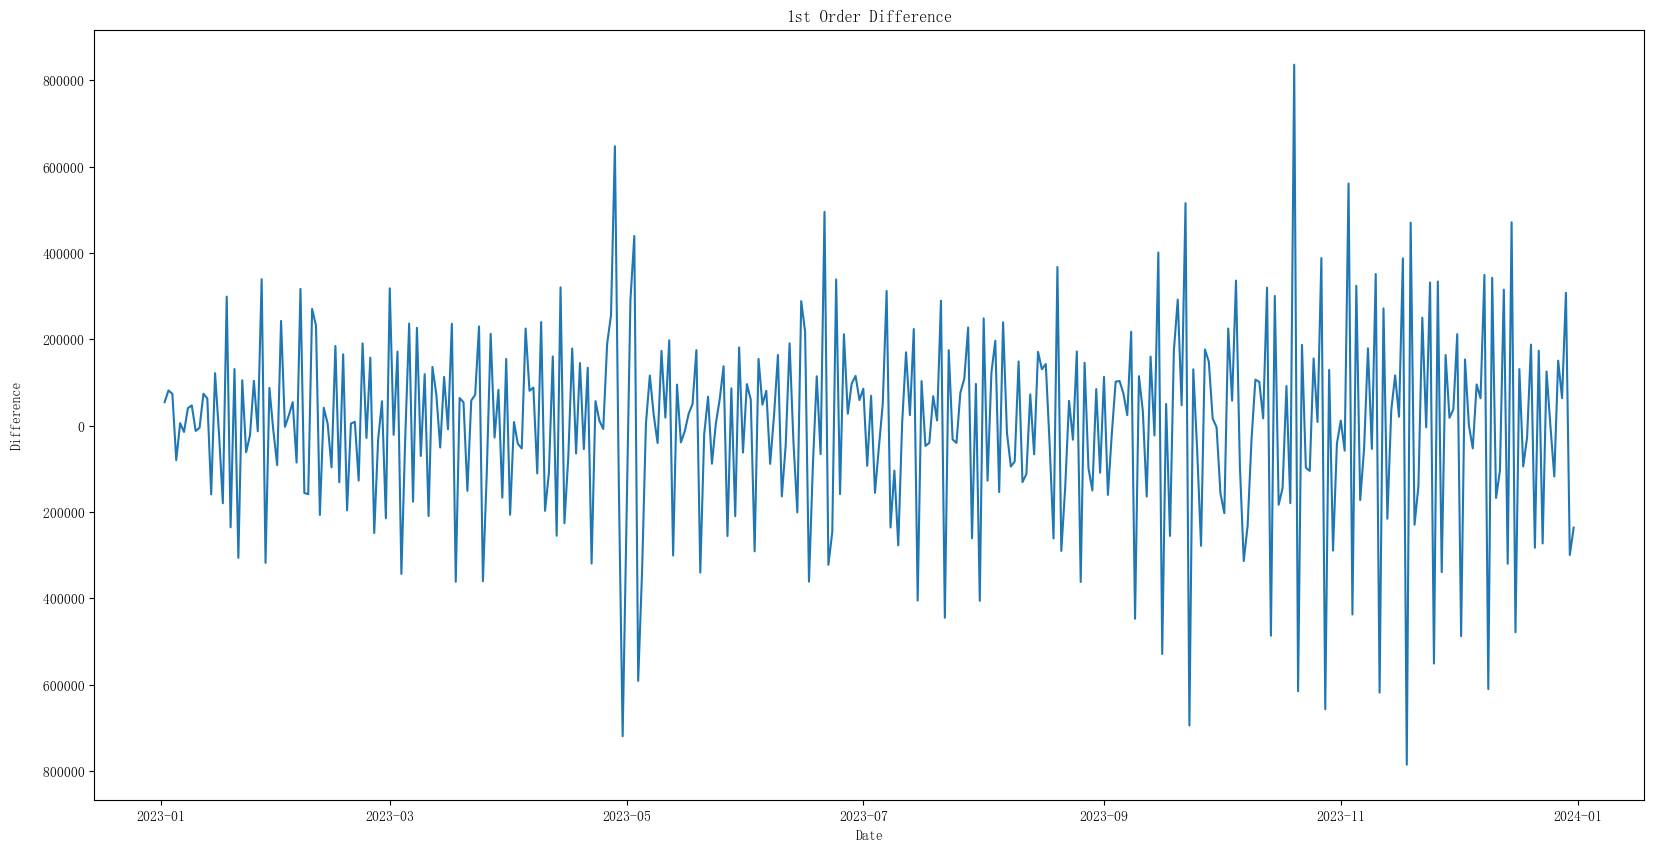

In [2]:
# 绘制1阶差分图
plt.figure(figsize=(20, 10))
plt.plot(diff_sales_1)
plt.title('1st Order Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

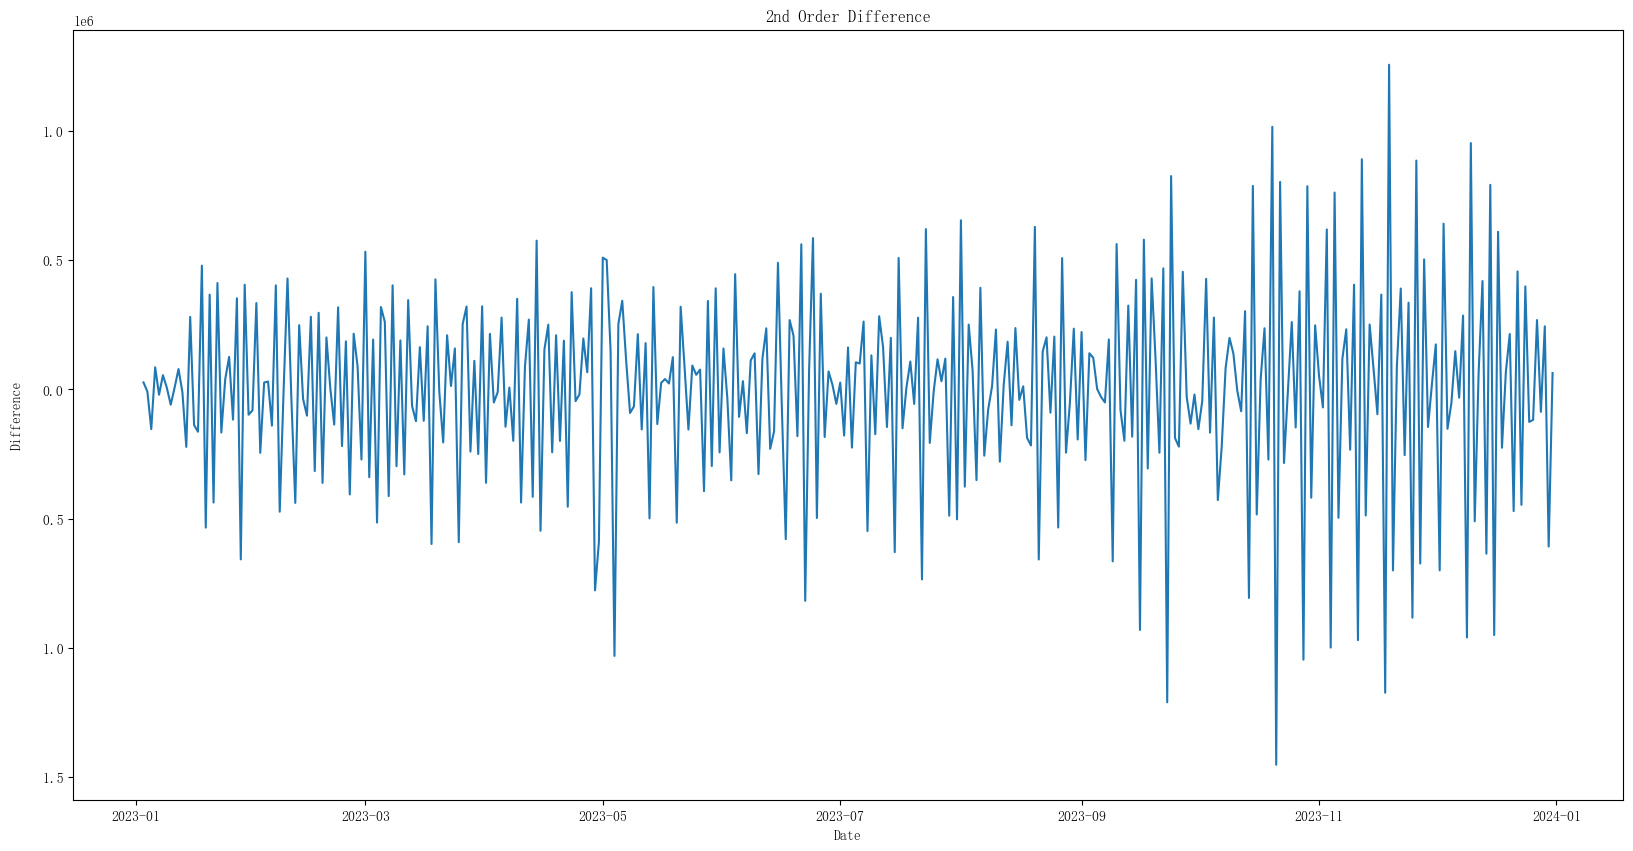

In [3]:
# 绘制2阶差分图
plt.figure(figsize=(20, 10))
plt.plot(diff_sales_2)
plt.title('2nd Order Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

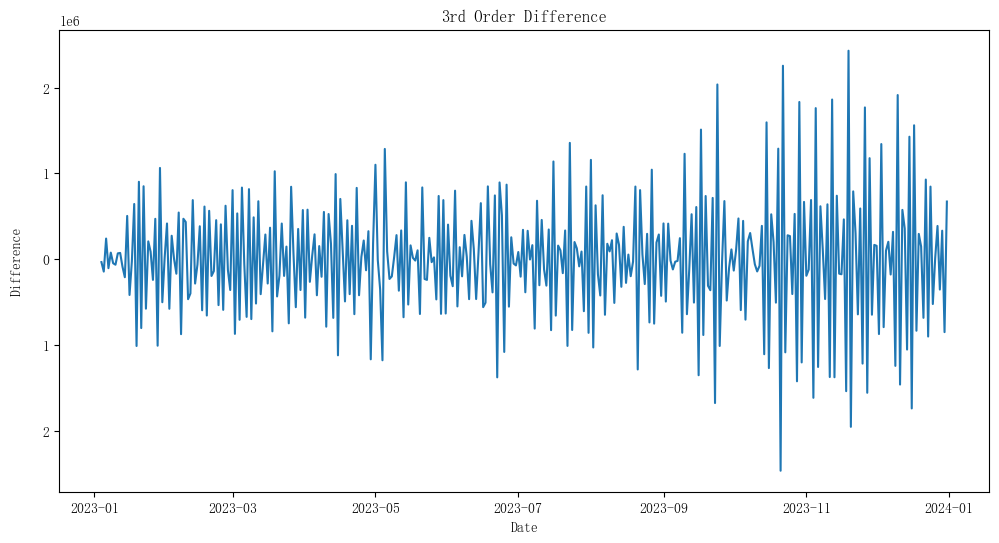

In [4]:
# 绘制3阶差分图
plt.figure(figsize=(12, 6))
plt.plot(diff_sales_3)
plt.title('3rd Order Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

D:\anaconda\envs\datawym\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


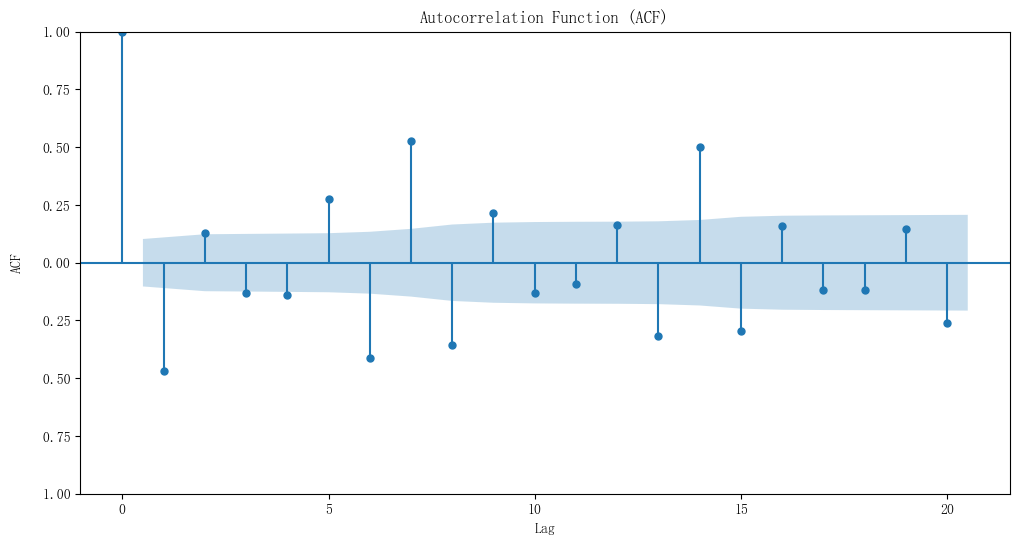

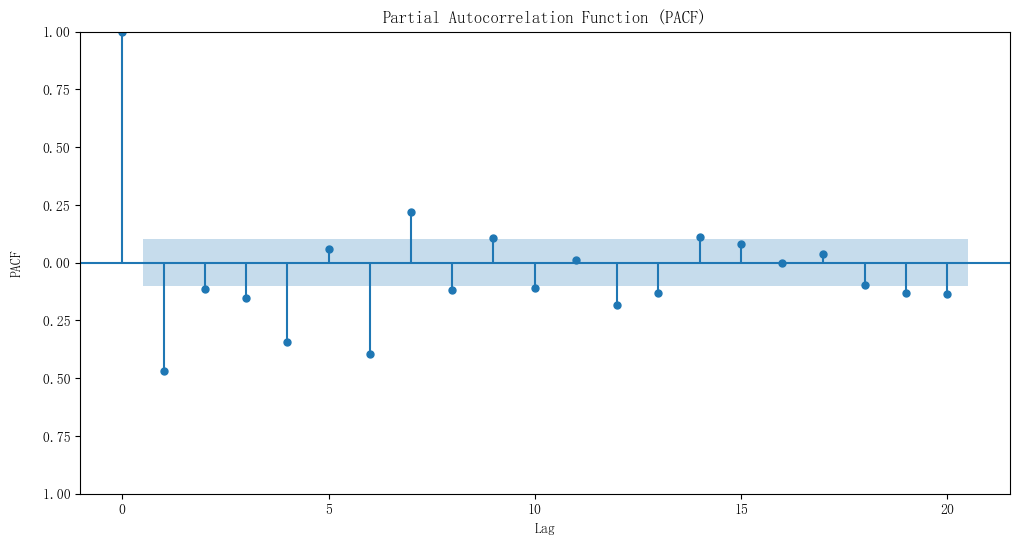

In [5]:
# 绘制 ACF 图
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(diff_sales_1.dropna(), lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')

# 绘制 PACF 图
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(diff_sales_1.dropna(), lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')

# 展示图形
plt.show()


In [6]:
#ADF检验，平稳性检验
result = adfuller(diff_sales_1.dropna())
result

(-6.90834762720944,
 1.2305905487607775e-09,
 13,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 9296.191269815114)

In [7]:
#白噪声检验
result = acorr_ljungbox(diff_sales_1.dropna(), lags=1)
result


,lb_stat,lb_pvalue
1,80.775731,2.528442e-19


In [13]:
# BIC和AIC
p_values = range(0, 20)  # AR 阶数范围
q_values = range(0, 20)  # MA 阶数范围

# 初始化最佳 BIC、AIC 和阶数
best_bic = float('inf')
best_aic = float('inf')
best_order = None

# 遍历参数空间
for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # 已确定的差分阶数
        try:
            # 拟合模型
            model_fit = model(diff_sales_1.dropna(), order=order).fit()
                
            # 计算 BIC 和 AIC
            bic = model_fit.bic
            aic = model_fit.aic
                
            # 更新最佳 BIC 和 AIC
            if bic < best_bic:
                best_bic = bic
                best_order = order
                
            if aic < best_aic:
                best_aic = aic
                best_order = order
            
        except:
            continue

# 打印最佳阶数和对应的 BIC、AIC
print('Best Order:', best_order)
print('Best BIC:', best_bic)
print('Best AIC:', best_aic)

Best Order: None
Best BIC: inf
Best AIC: inf
